l^{´}= [8.37548126e+07 1.67522808e+08 2.51299643e+08 3.35036901e+08
 4.18857880e+08 5.02570153e+08 5.86265233e+08 6.70418827e+08
 7.53875820e+08 8.37532307e+08 1.67524440e+09 2.51359238e+09
 3.34969519e+09 4.18830494e+09 5.02507145e+09 5.86217744e+09
 6.69928116e+09 7.53715994e+09 8.37418179e+09 1.67442429e+10
 2.51119853e+10 3.34697416e+10 4.18216957e+10 5.01678923e+10
 5.85373943e+10 6.68902383e+10 7.52464857e+10 8.35907303e+10
 1.66813013e+11 2.49960731e+11 3.33103575e+11 4.16044555e+11
 4.99475306e+11 5.82724571e+11 7.50401036e+11 8.34607886e+11
 9.18757756e+11 1.00350020e+12 1.08931597e+12 1.17529194e+12
 1.26114318e+12 1.34718946e+12 1.43376273e+12 1.52093554e+12
 1.61016562e+12 1.69962685e+12 1.78860063e+12 1.87715169e+12
 1.96630177e+12 2.05632528e+12 2.14723745e+12 2.23921263e+12
 2.33204129e+12 2.42705266e+12 2.52140466e+12 2.61542172e+12
 2.70996238e+12 2.80430632e+12 2.89888229e+12 2.99433692e+12
 3.08990087e+12 3.18662327e+12 3.28426338e+12 3.38295672e+12
 3.48355326e+12 3

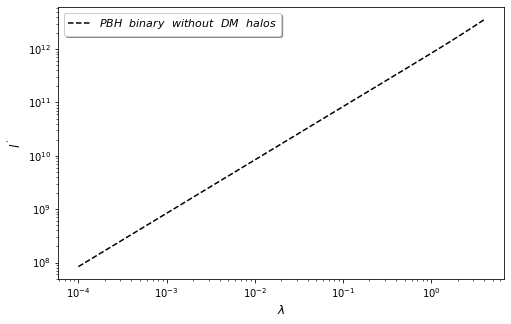

In [8]:
# Tidal torque exerted by the neighbouring PBH in the PBH binaries without dark matter 
# halos and decoupling around matter-radiation equality.


# Solution of eq.(14) using eq.(6) for PBH binaries without DM halos given in paper 
# "The merger rate of primordial-black-hole binaries".


#Variation of  l^{'} with λ for the PBH binary without DM halos decoupling 
# around matter-radiation equality.


import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt


π=np.pi
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity




λ_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,
        0.4,0.5,0.6,0.7,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,
        2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0]


A=(3/(8*G*π*rho_eq))**(1/2)


def h(s):
    return math.sqrt((s**-3)+(s**-4)) 

def H(s):
    return (1/((s**4)*h(s)))

def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(s)=h'(s).

   


l_list=np.zeros(len(λ_list))


    


def integral(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    χ=separations**2
    s_list=ss.tolist()
    H_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
    integrand=( χ*H_list)
    y=np.trapz(integrand,s_list)
    Y=A*y
    return Y
    
    
for k, λ_0 in enumerate(λ_list):
    l_list[k] = integral(λ_0)
print('l^{´}=',l_list)      
 
    
plt.figure(figsize=(8,5))
plt.loglog(λ_list,l_list,'k--')
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :11},
              loc='upper left',shadow = True,
           facecolor = 'white',fontsize=17)   
plt.show()   

l^{´}= [8.47431147e+07 1.69527312e+08 2.54291922e+08 3.39230675e+08
 4.23884129e+08 5.08991303e+08 5.93536980e+08 6.78698636e+08
 7.64717983e+08 8.49392473e+08 1.69976789e+09 2.55459042e+09
 3.41234921e+09 4.27057635e+09 5.13498661e+09 6.00366001e+09
 6.87004287e+09 7.73868249e+09 8.61401309e+09 1.75157297e+10
 2.67162377e+10 3.61595117e+10 4.58821732e+10 5.58819530e+10
 6.61385961e+10 7.66827009e+10 8.74439109e+10 9.84993252e+10
 2.22947897e+11 3.70870202e+11 5.41642878e+11 7.33197529e+11
 9.45633706e+11 1.17811307e+12 1.70095793e+12 1.99080574e+12
 2.29943337e+12 2.62544463e+12 2.96997930e+12 3.33343813e+12
 3.71379540e+12 4.11242965e+12 4.52739658e+12 4.96007572e+12
 5.41086688e+12 5.87910212e+12 6.36333993e+12 6.86603190e+12
 7.38468875e+12 7.92231872e+12 8.47616140e+12 9.04664247e+12
 9.63467827e+12 1.02372037e+13 1.08592230e+13 1.14979784e+13
 1.21521353e+13 1.28275740e+13 1.35151293e+13 1.42216316e+13
 1.49461625e+13 1.56858889e+13 1.64442512e+13 1.72186344e+13
 1.80097079e+13 1

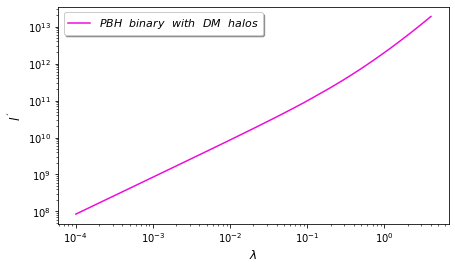

In [9]:
# Tidal torque exerted by the neighbouring PBH in the PBH binaries with dark matter 
# halos and decoupling around matter-radiation equality.


# Solution of eq.(56) using extended mass function in reference pdf "Angular momentum 
#  in the PBH binary".

#Variation of  l^{'} with λ for the PBH binary with DM halos decoupling 
# around matter-radiation equality.

A=(((3/(8*G*π*rho_eq))**(1/2)))
B=((((8*π*G*rho_eq*((t_eq)**6))/3)**(1/4)))


def m(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)
                                *math.sqrt(s+1))+(4/3))))



def h(s):
    return math.sqrt((s**-3)+(s**-4)) 

def H(s):
    return (1/((s**4)*h(s)))
def I(s):
    return ((math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))*H(s))



def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(s)=h'(s).

def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
                   
def  k(s):
    return (1/n(s))

def λ(s):
    return λ_0*k(s)
   

l_mr=np.zeros(len(λ_list))


def Y(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(56) in reference pdf "Angular momentum in the PBH binary".

    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((8*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    χ=separations**2
    s_list=ss.tolist()
    m_list=np.zeros(len(s_list))
    H_list=np.zeros(len(s_list))
    I_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
        I_list[i] = I(s)
        m_list[i] = m(s)
    integrand_1=(χ*H_list*m(s))
    integrand_2=(χ*I_list*m(s)) 
    y=np.trapz(integrand_1,s_list)     # 1st integral in eq.(56) in reference pdf "Angular momentum in the PBH binary".
    z=np.trapz(integrand_2,s_list)     # 2nd integral in eq.(56) in reference pdf "Angular momentum in the PBH binary".
    X=(A*y)+(z*B)
    return X
    
for i, λ_0 in enumerate(λ_list):
    l_mr[i] = Y(λ_0)
print('l^{´}=',l_mr) 

    

plt.figure(figsize=(7,4))
plt.loglog(λ_list,l_mr,'#ED0DD9')
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :11},
              loc='upper left',shadow = True,
           facecolor = 'white',fontsize=14)        
plt.show()

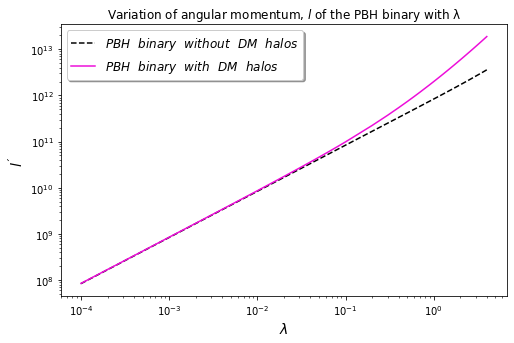

In [10]:
#Variation of l^{'} with λ for the PBH binaries with and without DM halos decoupling 
# upto matter-radiation equality.


plt.figure(figsize=(8,5))
plt.loglog(λ_list,l_list,'k--')
plt.loglog(λ_list, l_mr,'#ED0DD9')
plt.xlabel('$λ$',fontsize=14)
plt.ylabel('$l^{´}$',fontsize=14)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$','$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :12},
              loc='upper left',shadow = True,
               facecolor = 'white',fontsize=16)        

plt.title('Variation of angular momentum, $l$ of the PBH binary with λ')
plt.show()